# 2015 FINA World Championships

**Background for Swimming and the competition**
- There are 10 lanes in the pool with 0 indexing i.e. 0-9.
- Only 1-8 lanes are used for the competition purpose.
- The pool is 50m longs
- There are 4 strokes of competition 
    1. Freestyle
    2. Breaststroke
    3. Butterfly
    4. Backstroke
- There are different rounds
    1. For longer events we have Heats: Firt round, Finals: The final round
    2. For shorter events we have Heats: First round, Semifinals: Penultimate round, Finals: The final round
- The data is openly available at omegatiming.com


In [136]:
# importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import dc_stat_think as dcst
from IPython.display import Image
%matplotlib inline 

**Getting the data**

In [117]:
fina_2015 = pd.read_csv('datasets/2015_FINA.csv',comment='#')
fina_2013 = pd.read_csv('datasets/2015_FINA.csv',comment='#')
df = pd.read_csv('datasets/df.csv')

In [4]:
fina_2015.head()

,athleteid,lastname,firstname,birthdate,gender,name,code,eventid,heat,lane,...,swimtime,split,cumswimtime,splitdistance,daytime,round,distance,relaycount,stroke,splitswimtime
0,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,1,1,4,...,63.65,1,29.63,50,930.0,PRE,100,1,FLY,29.63
1,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,1,1,4,...,63.65,2,63.65,100,930.0,PRE,100,1,FLY,34.02
2,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,...,140.28,1,31.33,50,1014.0,PRE,200,1,FLY,31.33
3,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,...,140.28,2,66.81,100,1014.0,PRE,200,1,FLY,35.48
4,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,...,140.28,3,103.29,150,1014.0,PRE,200,1,FLY,36.48


In [5]:
fina_2015.columns

Index(['athleteid', 'lastname', 'firstname', 'birthdate', 'gender', 'name',
       'code', 'eventid', 'heat', 'lane', 'points', 'reactiontime', 'swimtime',
       'split', 'cumswimtime', 'splitdistance', 'daytime', 'round', 'distance',
       'relaycount', 'stroke', 'splitswimtime'],
      dtype='object')

In [16]:
fina_2015.gender.value_counts()

M    6187
F    5236
Name: gender, dtype: int64

In [6]:
fina_2015.stroke.value_counts()

FREE      6782
MEDLEY    1288
BREAST    1205
FLY       1095
BACK      1053
Name: stroke, dtype: int64

In [7]:
fina_2015.distance.value_counts()

200     2944
1500    2554
400     1805
100     1659
800     1601
50       860
Name: distance, dtype: int64

In [19]:
fina_2015.heat.value_counts()

1     3181
2     2297
3     1838
4     1561
5     1317
6      439
7      386
8      167
9      100
10      58
11      40
12      39
Name: heat, dtype: int64

In [15]:
fina_2015['round'].value_counts()

PRE    8904
FIN    1475
SEM    1022
SOS      18
SOP       4
Name: round, dtype: int64

In [25]:
mens_200_free_heats = fina_2015[(fina_2015.gender=='M')&(fina_2015.distance==200)&(fina_2015.stroke=='FREE')&(fina_2015['round']=='PRE')&(fina_2015.splitdistance==200)]['swimtime'].values

**Graphical EDA of men's 200 free heats**
In the heats, all contestants swim, the very fast and the very slow. To explore how the swim times are distributed, plot an ECDF of the men's 200 freestyle.

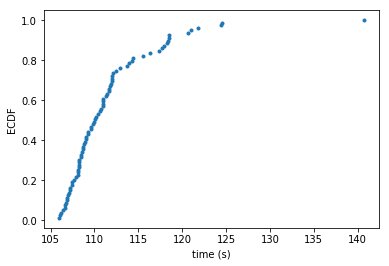

In [31]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(mens_200_free_heats)

# Plot the ECDF as dots
_ = plt.plot(x,y,marker='.',linestyle='none')

# Label axes and show plot
_ = plt.xlabel('time (s)')
_ = plt.ylabel('ECDF')
plt.show()

We see that fast swimmers are below 115 seconds, with a smattering of slow swimmers past that, including one very slow swimmer.

**200 m free time with confidence interval**

Now, we will practice parameter estimation and computation of confidence intervals by computing the mean and median swim time for the men's 200 freestyle heats. The median is useful because it is immune to heavy tails in the distribution of swim times, such as the slow swimmers in the heats.

In [32]:
# Compute mean and median swim times
mean_time = np.mean(mens_200_free_heats)
median_time = np.median(mens_200_free_heats)

# Draw 10,000 bootstrap replicates of the mean and median
bs_reps_mean = dcst.draw_bs_reps(mens_200_free_heats,np.mean,size=10000)
bs_reps_median = dcst.draw_bs_reps(mens_200_free_heats,np.median,size=10000)


# Compute the 95% confidence intervals
conf_int_mean = np.percentile(bs_reps_mean,[2.5,97.5])
conf_int_median = np.percentile(bs_reps_median,[2.5,97.5])
# Print the result to the screen
print("""
mean time: {0:.2f} sec.
95% conf int of mean: [{1:.2f}, {2:.2f}] sec.

median time: {3:.2f} sec.
95% conf int of median: [{4:.2f}, {5:.2f}] sec.
""".format(mean_time, *conf_int_mean, median_time, *conf_int_median))


mean time: 111.63 sec.
95% conf int of mean: [110.50, 112.89] sec.

median time: 110.04 sec.
95% conf int of median: [108.96, 111.29] sec.



 Indeed, the mean swim time is longer than the median because of the effect of the very slow swimmers.

**Question: Do individual female swimmers swim faster in finals than in semifinals?**
Events : 50, 100, 200 meter freestyle, breststroke, butterfly, backstroke

Metric for calculation: 
Fractional improvement = (semifinal time - final time)/semifinal time

Improved Questions*

**1.Question: What is the fractional improvement of individual female swimmers from the semifinals to finals?**

**2.Question: Is observed fractionl improvement commensurate with there being no difference in performance in the semifinals and finals**


EDA: finals versus semifinals

In [118]:
semi_times = df.semi_swimtime.values
final_times = df.final_swimtime.values

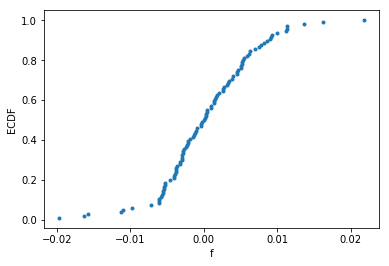

In [119]:
# Compute fractional difference in time between finals and semis
f = (semi_times - final_times) / semi_times

# Generate x and y values for the ECDF: x, y
x,y = dcst.ecdf(f)

# Make a plot of the ECDF
_ = plt.plot(x,y,marker='.',linestyle='none')

# Label axes and show plot
_ = plt.xlabel('f')
_ = plt.ylabel('ECDF')
plt.show()


The median of the ECDF is juuuust above zero. But at first glance, it does not look like there is much of any difference between semifinals and finals

**Parameter estimates of difference between finals and semifinals**

In [120]:
# Mean fractional time difference: f_mean
f_mean = np.mean(f)

# Get bootstrap reps of mean: bs_reps
bs_reps = dcst.draw_bs_reps(f,np.mean,size=10000)

# Compute confidence intervals: conf_int
conf_int = np.percentile(bs_reps,[2.5,97.5])

# Report
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]""".format(f_mean, *conf_int))



mean frac. diff.: 0.00040
95% conf int of mean frac. diff.: [-0.00092, 0.00174]


It looks like the mean finals time is juuuust faster than the mean semifinal time, and they very well may be the same.

**Permutation Test**
1. Take an array of semifinal times and an array of final times for each swimmer for each stroke/distance pair.
2. Go through each array, and for each index, swap the entry in the respective final and semifinal array with a 50% probability.
3. Use the resulting final and semifinal arrays to compute f and then the mean of f.

**Plotting the Data**
You can see that there is wide variability in the splits among the swimmers, and what appears to be a slight trend toward slower split times.

In [121]:
def swap_random(a, b):
    """Randomly swap entries in two arrays."""
    # Indices to swap
    swap_inds = np.random.random(size=len(a)) < 0.5
    
    # Make copies of arrays a and b for output
    a_out = np.copy(a)
    b_out = np.copy(b)
    
    # Swap values
    a_out[swap_inds] = b[swap_inds]
    b_out[swap_inds] = a[swap_inds]

    return a_out, b_out

# Set up array of permutation replicates
perm_reps = np.empty(1000)

for i in range(1000):
    # Generate a permutation sample
    semi_perm, final_perm = swap_random(semi_times, final_times)
    
    # Compute f from the permutation sample
    f = (semi_perm - final_perm) / semi_perm
    
    # Compute and store permutation replicate
    perm_reps[i] = np.mean(f)

# Compute and print p-value
print('p =', np.sum(perm_reps >= f_mean) / 1000)

p = 0.287


 The p-value is large, about 0.27, which suggests that the results of the 2015 World Championships are consistent with there being no difference in performance between the finals and semifinals.

#### How does the performance of swimmers decline over long events?50

Quantifying slowdown:
    1. Use Women's 800m freestyle heats
    2. Omit first and last 100m
    3. Compute mean split time for each split number
    4. Perform linear regression to get slowdown per split
    5. Perform hypothesis test: can the slowdown be explained by random variation?

Hypothesis for correlation:
    Null: Split time and Split number are completely uncorrelated
    Alternate: They are correlated
Test Statistic : Pearson Cofficient


In [122]:
splits = np.array([[35.04, 36.39, 35.92, 36.23, 36.67, 36.76, 36.48, 36.85, 36.92,
        36.68, 36.97, 36.98],
       [34.14, 34.22, 33.67, 33.88, 34.15, 33.91, 34.41, 33.92, 34.36,
        34.38, 34.6 , 34.45],
       [31.8 , 31.91, 31.95, 32.04, 31.95, 31.65, 31.57, 31.39, 31.61,
        31.43, 31.46, 31.47],
       [33.16, 32.9 , 32.68, 32.84, 33.55, 33.74, 33.71, 33.6 , 33.71,
        33.12, 33.14, 32.79],
       [32.97, 32.83, 32.99, 32.94, 33.19, 33.6 , 33.72, 33.74, 33.82,
        33.67, 33.86, 33.59],
       [34.6 , 34.57, 34.62, 34.96, 35.1 , 35.22, 35.63, 35.56, 35.43,
        35.67, 35.26, 35.42],
       [32.18, 32.17, 32.15, 32.16, 32.31, 32.27, 32.32, 32.23, 32.42,
        32.34, 32.32, 32.27],
       [32.4 , 32.14, 32.46, 32.43, 32.58, 32.46, 32.6 , 32.42, 32.79,
        32.33, 32.47, 32.63],
       [32.67, 32.54, 32.48, 32.42, 32.55, 32.45, 32.94, 33.03, 33.12,
        33.47, 33.42, 33.48],
       [33.76, 34.95, 34.76, 35.45, 34.99, 36.11, 35.27, 35.82, 35.48,
        36.12, 35.2 , 36.07],
       [32.57, 32.7 , 32.53, 32.73, 32.84, 32.7 , 32.75, 33.07, 33.01,
        33.11, 33.17, 33.02],
       [35.04, 34.69, 34.24, 34.07, 34.47, 34.39, 34.98, 34.56, 35.3 ,
        34.9 , 35.03, 34.08],
       [32.61, 32.97, 33.09, 33.19, 33.72, 33.92, 34.12, 33.82, 34.07,
        34.22, 34.26, 34.07],
       [31.01, 31.49, 31.38, 31.47, 31.58, 31.56, 31.68, 31.68, 32.09,
        31.83, 32.25, 31.67],
       [32.29, 32.36, 32.43, 32.56, 32.84, 32.73, 32.77, 32.78, 32.91,
        33.15, 33.19, 33.32],
       [31.92, 32.14, 31.87, 32.02, 31.84, 32.47, 32.17, 32.73, 32.45,
        33.16, 33.01, 33.08],
       [32.1 , 32.47, 32.32, 32.84, 32.38, 32.93, 32.36, 32.96, 32.72,
        33.35, 32.95, 33.77],
       [35.97, 35.96, 36.09, 36.  , 36.59, 36.55, 36.4 , 36.58, 36.89,
        36.69, 36.81, 36.73],
       [31.69, 31.56, 31.76, 31.43, 31.69, 31.77, 31.88, 31.66, 31.96,
        31.87, 31.66, 31.73],
       [31.71, 32.23, 31.89, 32.31, 32.01, 32.62, 32.12, 33.  , 32.63,
        33.14, 32.55, 33.39],
       [31.99, 31.94, 31.82, 32.02, 31.71, 32.  , 31.79, 31.87, 31.97,
        32.15, 32.09, 32.3 ],
       [31.88, 31.78, 31.67, 31.68, 31.97, 31.7 , 31.71, 31.87, 31.91,
        32.  , 31.83, 32.13],
       [32.49, 32.32, 32.77, 32.8 , 32.87, 32.85, 32.89, 33.  , 33.12,
        32.86, 33.05, 32.75],
       [31.99, 31.93, 31.76, 31.85, 31.95, 31.82, 31.64, 31.49, 31.78,
        31.67, 32.28, 31.85],
       [32.19, 32.32, 32.55, 32.74, 32.59, 32.94, 32.75, 33.09, 32.91,
        33.53, 33.06, 33.  ],
       [32.37, 32.62, 32.38, 33.07, 32.91, 33.45, 32.97, 33.38, 33.24,
        33.33, 32.93, 32.53],
       [32.8 , 33.38, 33.18, 33.78, 33.78, 34.32, 34.1 , 34.88, 33.97,
        34.96, 34.44, 34.93],
       [34.9 , 35.03, 35.25, 35.42, 35.88, 35.63, 35.63, 35.66, 35.45,
        35.66, 35.39, 35.34],
       [32.67, 32.3 , 32.4 , 32.48, 32.52, 32.59, 32.73, 32.67, 32.97,
        32.7 , 32.87, 32.82],
       [32.68, 33.02, 32.8 , 32.94, 33.28, 33.46, 33.2 , 33.42, 33.14,
        33.36, 33.38, 33.31],
       [33.96, 33.93, 33.62, 33.76, 33.31, 33.7 , 33.02, 33.66, 33.57,
        33.37, 33.91, 33.92],
       [32.36, 32.6 , 32.12, 32.67, 32.56, 32.91, 32.84, 33.17, 32.95,
        33.44, 33.25, 33.59],
       [31.69, 31.81, 31.99, 31.99, 32.01, 31.77, 31.67, 31.62, 31.66,
        31.82, 31.63, 31.72],
       [36.95, 37.44, 36.96, 37.12, 37.51, 37.07, 37.49, 36.66, 36.84,
        37.11, 37.55, 37.6 ],
       [32.61, 32.92, 32.74, 32.88, 33.16, 33.21, 33.2 , 33.13, 33.04,
        33.09, 33.31, 33.45],
       [31.01, 31.5 , 31.29, 31.59, 31.77, 31.67, 31.79, 31.94, 32.  ,
        31.98, 32.1 , 32.03],
       [33.66, 33.92, 33.99, 34.21, 33.99, 34.16, 34.22, 34.44, 34.11,
        34.37, 34.43, 34.33],
       [32.91, 33.59, 33.56, 33.96, 34.83, 34.98, 35.43, 35.09, 35.94,
        35.99, 36.16, 35.74],
       [33.23, 34.1 , 33.87, 34.28, 34.23, 34.37, 34.19, 34.38, 34.23,
        34.48, 34.34, 34.4 ],
       [32.34, 32.3 , 32.13, 32.4 , 32.74, 32.57, 32.81, 32.92, 32.89,
        32.92, 33.01, 32.73],
       [30.77, 31.1 , 31.2 , 31.36, 31.31, 31.44, 31.31, 31.7 , 31.75,
        31.64, 31.86, 31.97],
       [31.9 , 31.98, 32.04, 31.98, 31.97, 31.83, 32.04, 31.92, 32.02,
        31.96, 32.07, 31.99],
       [32.39, 32.13, 32.24, 32.28, 32.17, 32.22, 32.1 , 32.25, 32.4 ,
        32.55, 32.64, 32.48]])
split_number = np.array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

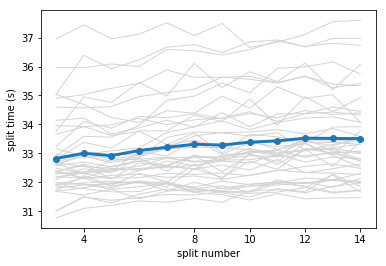

In [123]:
# Plot the splits for each swimmer
for splitset in splits:
    _ = plt.plot(split_number, splitset, lw=1, color='lightgray')

# Compute the mean split times
mean_splits = np.mean(splits,axis=0)

# Plot the mean split times
_ = plt.plot(split_number, mean_splits, marker='.', linewidth=3, markersize=12)

# Label axes and show plot
_ = plt.xlabel('split number')
_ = plt.ylabel('split time (s)')
plt.show()

**Linear regression of average split time**

We will assume that the swimmers slow down in a linear fashion over the course of the 800 m event. The slowdown per split is then the slope of the mean split time versus split number plot.

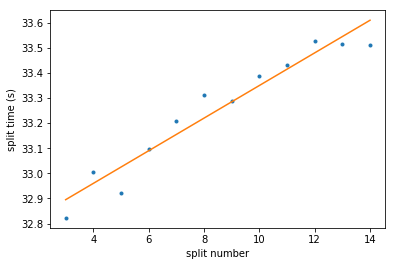


mean slowdown: 0.065 sec./split
95% conf int of mean slowdown: [0.051, 0.079] sec./split


In [124]:
# Perform regression
slowdown, split_3 = np.polyfit(split_number,mean_splits,1)

# Compute pairs bootstrap
bs_reps, _ = dcst.draw_bs_pairs_linreg(split_number,mean_splits,size=10000)

# Compute confidence interval
conf_int = np.percentile(bs_reps,[2.5,97.5])

# Plot the data with regressions line
_ = plt.plot(split_number, mean_splits, marker='.', linestyle='none')
_ = plt.plot(split_number, split_number * slowdown + split_3, '-')

# Label axes and show plot
_ = plt.xlabel('split number')
_ = plt.ylabel('split time (s)')
plt.show()

# Print the slowdown per split
print("""
mean slowdown: {0:.3f} sec./split
95% conf int of mean slowdown: [{1:.3f}, {2:.3f}] sec./split""".format(
    slowdown, *conf_int))


There is a small (about 6 hundreths of a second), but discernible, slowdown per split.

**Hypothesis test: are they slowing down?**

Now we will test the null hypothesis that the swimmer's split time is not at all correlated with the distance they are at in the swim. We will use the Pearson correlation coefficient as the test statistic.

In [125]:
# Observed correlation
rho = dcst.pearson_r(split_number,mean_splits)

# Initialize permutation reps
perm_reps_rho = np.empty(10000)

# Make permutation reps
for i in range(10000):
    # Scramble the split number array
    scrambled_split_number = np.random.permutation(split_number)
    
    # Compute the Pearson correlation coefficient
    perm_reps_rho[i] = dcst.pearson_r(scrambled_split_number,mean_splits)
    
# Compute and print p-value
p_val = np.sum(perm_reps_rho >= rho) / 10000
print('p =', p_val)


p = 0.0


The tiny effect is very real! With 10,000 replicates, we never got a correlation as big as observed under the hypothesis that the swimmers do not change speed as the race progresses.

# 2013 Current Controversy

1. Investigate improvement of individual swimmers moving from low to hih numbered lanes in 50m events
2. Compute the size of the effect
3. Test the hypothesis that on average there is no difference between low and high numbered lanes 

A mteric for improvement
The fractional improvement of swim time, (ta - tb) / ta.
where ta is the swim time in a low numbered lane and tb is the swim time in a high numbered lane

In [128]:
swimtime_high_lanes = np.array([24.62, 22.9 , 27.05, 24.76, 30.31, 24.54, 26.12, 27.71, 23.15,
       23.11, 21.62, 28.02, 24.73, 24.95, 25.83, 30.61, 27.04, 21.67,
       27.16, 30.23, 21.51, 22.97, 28.05, 21.65, 24.54, 26.06])
swimtime_low_lanes = np.array([24.66, 23.28, 27.2 , 24.95, 32.34, 24.66, 26.17, 27.93, 23.35,
       22.93, 21.93, 28.33, 25.14, 25.19, 26.11, 31.31, 27.44, 21.85,
       27.48, 30.66, 21.74, 23.22, 27.93, 21.42, 24.79, 26.46])

** ECDF of improvement from low to high lanes**

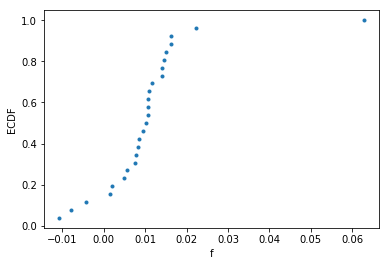

In [129]:
# Compute the fractional improvement of being in high lane: f
f = (swimtime_low_lanes - swimtime_high_lanes) / swimtime_low_lanes

# Make x and y values for ECDF: x, y
x,y = dcst.ecdf(f)

# Plot the ECDFs as dots
_ = plt.plot(x,y,marker='.',linestyle='none')
# Label the axes and show the plot
_=plt.xlabel('f')
_= plt.ylabel('ECDF')
plt.show()



 Oooo, this is starting to paint a picture of lane bias. The ECDF demonstrates that all but three of the 26 swimmers swam faster in the high numbered lanes

**Estimation of mean improvement**

We will now estimate how big this current effect is. Let us compute the mean fractional improvement for being in a high-numbered lane versus a low-numbered lane, along with a 95% confidence interval of the mean.

In [130]:
# Compute the mean difference: f_mean
f_mean = np.mean(f)

# Draw 10,000 bootstrap replicates: bs_reps
bs_reps = dcst.draw_bs_reps(f,np.mean,size=10000)

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_reps,[2.5,97.5])

# Print the result
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]""".format(f_mean, *conf_int))


mean frac. diff.: 0.01051
95% conf int of mean frac. diff.: [0.00622, 0.01597]


It sure looks like swimmers are faster in lanes 6-8.

**Simulating for Hypothesis**

Subtract the mean of f from f to generate f_shift. Then, take bootstrap replicate of the mean from this f_shift.

**Hypothesis test: Does lane assignment affect performance?**

In [131]:
# Shift f: f_shift
f_shift = f - np.mean(f)

# Draw 100,000 bootstrap replicates of the mean: bs_reps
bs_reps = dcst.draw_bs_reps(f_shift,np.mean,size=100000)

# Compute and report the p-value
p_val = np.sum(bs_reps >= f_mean) / 100000
print('p =', p_val)

p = 0.00041


**A p-value of 0.0004 is quite small and suggests that the mean fractional improvment is greater than zero.**

**Did the 2015 event have this problem?**

We would like to know if this is a typical problem with pools in competitive swimming. To address this question, perform a similar analysis for the results of the 2015 FINA World Championships. That is, compute the mean fractional improvement for going from lanes 1-3 to lanes 6-8 for the 2015 competition, along with a 95% confidence interval on the mean. Also test the hypothesis that the mean fractional improvement is zero.

In [134]:
swimtime_high_lanes_15 = np.array([27.7 , 24.64, 23.21, 23.09, 26.87, 30.74, 21.88, 24.5 , 21.86,
       25.9 , 26.2 , 24.73, 30.13, 26.92, 24.31, 30.25, 26.76])
swimtime_low_lanes_15 = np.array([27.66, 24.69, 23.29, 23.05, 26.87, 31.03, 22.04, 24.51, 21.86,
       25.64, 25.91, 24.77, 30.14, 27.23, 24.31, 30.2 , 26.86])

In [135]:
# Compute f and its mean
f = (swimtime_low_lanes_15 - swimtime_high_lanes_15) / swimtime_low_lanes_15
f_mean = np.mean(f)

# Draw 10,000 bootstrap replicates
bs_reps = dcst.draw_bs_reps(f,np.mean,size=10000)

# Compute 95% confidence interval
conf_int = np.percentile(bs_reps,[2.5,97.5])

# Shift f
f_shift = f - np.mean(f)

# Draw 100,000 bootstrap replicates of the mean
bs_reps = dcst.draw_bs_reps(f_shift,np.mean,size=100000)

# Compute the p-value
p_val = np.sum(bs_reps >= f_mean) / 100000

# Print the results
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]
p-value: {3:.5f}""".format(f_mean, *conf_int,p_val))


mean frac. diff.: 0.00079
95% conf int of mean frac. diff.: [-0.00190, 0.00344]
p-value: 0.28111


**Both the confidence interval an the p-value suggest that there was no lane bias in 2015.**

**The Zigzag Effect**
We can see that in 2013, there is zig zag effect for lanes 1-3 and 6-8. It suspects us for the currents in pool water since there is no zig zag patter in 2015(faded plot)

![title](images/download.jpg)

**Which splits should we consider?**


As we proceed to quantitatively analyze the zigzag effect in the 1500 m, which splits should we include in our analysis?

We should include all splits except the first two and the last two. We should neglect the last two because swimmers stop pacing themselves and "kick" for the final stretch. The first two are different because they involve jumping off the starting blocks and more underwater swimming than others.

**EDA: mean differences between odd and even splits**
To investigate the differences between odd and even splits, we first need to define a difference metric. Previouly we investigated the improvement of moving from a low-numbered lane to a high-numbered lane, defining f = (ta - tb) / ta. There, the ta in the denominator served as our reference time for improvement. Here, we are considering both improvement and decline in performance depending on the direction of swimming, so we want the reference to be an average. So, we will define the fractional difference as f = 2(ta - tb) / (ta + tb).

We plot the mean fractional difference between odd and even splits versus lane number. We have already calculated the mean fractional differences for the 2013 and 2015 Worlds, and they are stored in f_13 and f_15. The corresponding lane numbers are in the array lanes.

In [141]:
f_13 = np.array([-0.01562214, -0.0146381 , -0.00977673, -0.00525713,  0.00204104,
        0.00381014,  0.0075664 ,  0.01525869])
f_15 = np.array([-0.00516018, -0.00392952, -0.00099284,  0.00059953, -0.002424  ,
       -0.00451099,  0.00047467,  0.00081962])
lanes = np.linspace(1,8,8)

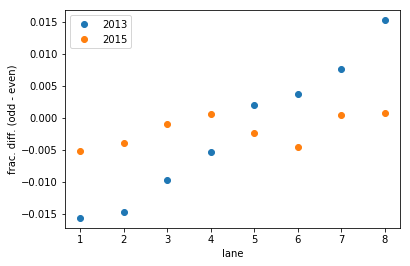

In [143]:
# Plot the the fractional difference for 2013 and 2015
_ = plt.plot(lanes,f_13,marker='.',markersize=12,linestyle='none')
_ = plt.plot(lanes,f_15,marker='.',markersize=12,linestyle='none')

# Add a legend
_ = plt.legend((2013, 2015))

# Label axes and show plot
_ = plt.xlabel('lane')
_ = plt.ylabel('frac. diff. (odd - even)')
plt.show()

EDA has exposed a strong slope in 2013 compared to 2015!

**How does the current effect depend on lane position?**

To quantify the effect of lane number on performance, perform a linear regression on the f_13 versus lanes data. Do a pairs bootstrap calculation to get a 95% confidence interval. Finally, make a plot of the regression


slope: 0.00447 per lane
95% conf int: [0.00393, 0.00501] per lane


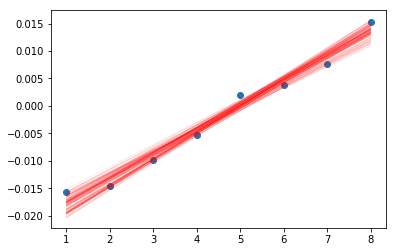

In [146]:
# Compute the slope and intercept of the frac diff/lane curve
slope, intercept = np.polyfit(lanes,f_13,1)

# Compute bootstrap replicates
bs_reps_slope, bs_reps_int = dcst.draw_bs_pairs_linreg(lanes,f_13,size=10000)

# Compute 95% confidence interval of slope
conf_int = np.percentile(bs_reps_slope,[2.5,97.5])

# Print slope and confidence interval
print("""
slope: {0:.5f} per lane
95% conf int: [{1:.5f}, {2:.5f}] per lane""".format(slope, *conf_int))

# x-values for plotting regression lines
x = np.array([1,8])
_ = plt.plot(lanes,f_13,marker='.',markersize=12,linestyle='none')
# Plot 100 bootstrap replicate lines
for i in range(100):
    _ = plt.plot(x, bs_reps_slope[i]*x+ bs_reps_int[i], 
                 color='red', alpha=0.2, linewidth=0.5)
    
# Update the plot
plt.draw()
plt.show()


The slope is a fractional difference of about 0.4% per lane. This is quite a substantial difference at this elite level of swimming where races can be decided by tiny differences.

**Hypothesis test: can this be by chance?**
    
The EDA and linear regression analysis is pretty conclusive. Nonetheless, we will top off the analysis of the zigzag effect by testing the hypothesis that lane assignment has nothing to do with the mean fractional difference between even and odd lanes using a permutation test. We will use the Pearson correlation coefficient. 

In [147]:
# Compute observed correlation: rho
rho = dcst.pearson_r(lanes,f_13)

# Initialize permutation reps: perm_reps_rho
perm_reps_rho = np.empty(10000)

# Make permutation reps
for i in range(10000):
    # Scramble the lanes array: scrambled_lanes
    scrambled_lanes = np.random.permutation(lanes)
    # Compute the Pearson correlation coefficient
    perm_reps_rho[i] = dcst.pearson_r(scrambled_lanes,f_13)
    
# Compute and print p-value
p_val = np.sum(perm_reps_rho >= rho) / 10000
print('p =', p_val)

p = 0.0


The p-value is very small, as we would expect from the confidence interval of the last exercise